In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')

# PRECISION Farbpalette
PRECISION_COLORS = {
    'primary': '#005a8c',
    'secondary': '#007cb0',
    'accent': '#00a0d2',
    'success': '#4a9b5e',
    'warning': '#e8a027',
    'danger': '#c9302c'
}

# Plotting-Einstellungen
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'figure.dpi': 150,
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False
})

print('Setup erfolgreich!')

Setup erfolgreich!


In [2]:
# Seed für Reproduzierbarkeit
np.random.seed(42)

# Synthetische Patientendaten erstellen
n_patients = 200

data = {
    'patient_id': [f'PAT_{i:04d}' for i in range(1, n_patients + 1)],
    'age': np.random.normal(55, 15, n_patients).astype(int).clip(18, 90),
    'gender': np.random.choice(['M', 'F'], n_patients, p=[0.52, 0.48]),
    'bmi': np.random.normal(26, 5, n_patients).round(1).clip(15, 45),
    'blood_pressure_sys': np.random.normal(130, 20, n_patients).astype(int).clip(90, 200),
    'blood_pressure_dia': np.random.normal(80, 12, n_patients).astype(int).clip(50, 120),
    'cholesterol': np.random.normal(200, 40, n_patients).round(0).clip(100, 350),
    'glucose': np.random.normal(100, 25, n_patients).round(0).clip(60, 250),
    'treatment_group': np.random.choice(['A', 'B', 'Placebo'], n_patients, p=[0.4, 0.4, 0.2]),
    'response': np.random.choice([0, 1], n_patients, p=[0.35, 0.65])
}

df = pd.DataFrame(data)
print(f'Datensatz erstellt: {len(df)} Patienten')

Datensatz erstellt: 200 Patienten


In [3]:
# Erste Zeilen anzeigen
df.head(10)

,patient_id,age,gender,bmi,blood_pressure_sys,blood_pressure_dia,cholesterol,glucose,treatment_group,response
0,PAT_0001,62,F,25.5,147,110,208.0,65.0,A,1
1,PAT_0002,52,F,28.0,123,78,228.0,60.0,B,1
2,PAT_0003,64,F,29.5,154,93,196.0,126.0,B,0
3,PAT_0004,77,F,24.0,121,71,258.0,161.0,Placebo,1
4,PAT_0005,51,M,27.1,90,79,173.0,135.0,A,1
5,PAT_0006,51,M,26.1,109,101,272.0,114.0,B,1
6,PAT_0007,78,F,26.5,92,72,198.0,115.0,A,1
7,PAT_0008,66,F,22.1,122,101,143.0,121.0,A,1
8,PAT_0009,47,F,26.1,130,88,205.0,119.0,B,0
9,PAT_0010,63,F,28.5,163,73,173.0,107.0,B,1


In [4]:
# Datentypen und fehlende Werte
print('Datentypen:')
print(df.dtypes)
print('\nFehlende Werte:')
print(df.isnull().sum())

Datentypen:
patient_id             object
age                     int64
gender                 object
bmi                   float64
blood_pressure_sys      int64
blood_pressure_dia      int64
cholesterol           float64
glucose               float64
treatment_group        object
response                int64
dtype: object

Fehlende Werte:
patient_id            0
age                   0
gender                0
bmi                   0
blood_pressure_sys    0
blood_pressure_dia    0
cholesterol           0
glucose               0
treatment_group       0
response              0
dtype: int64


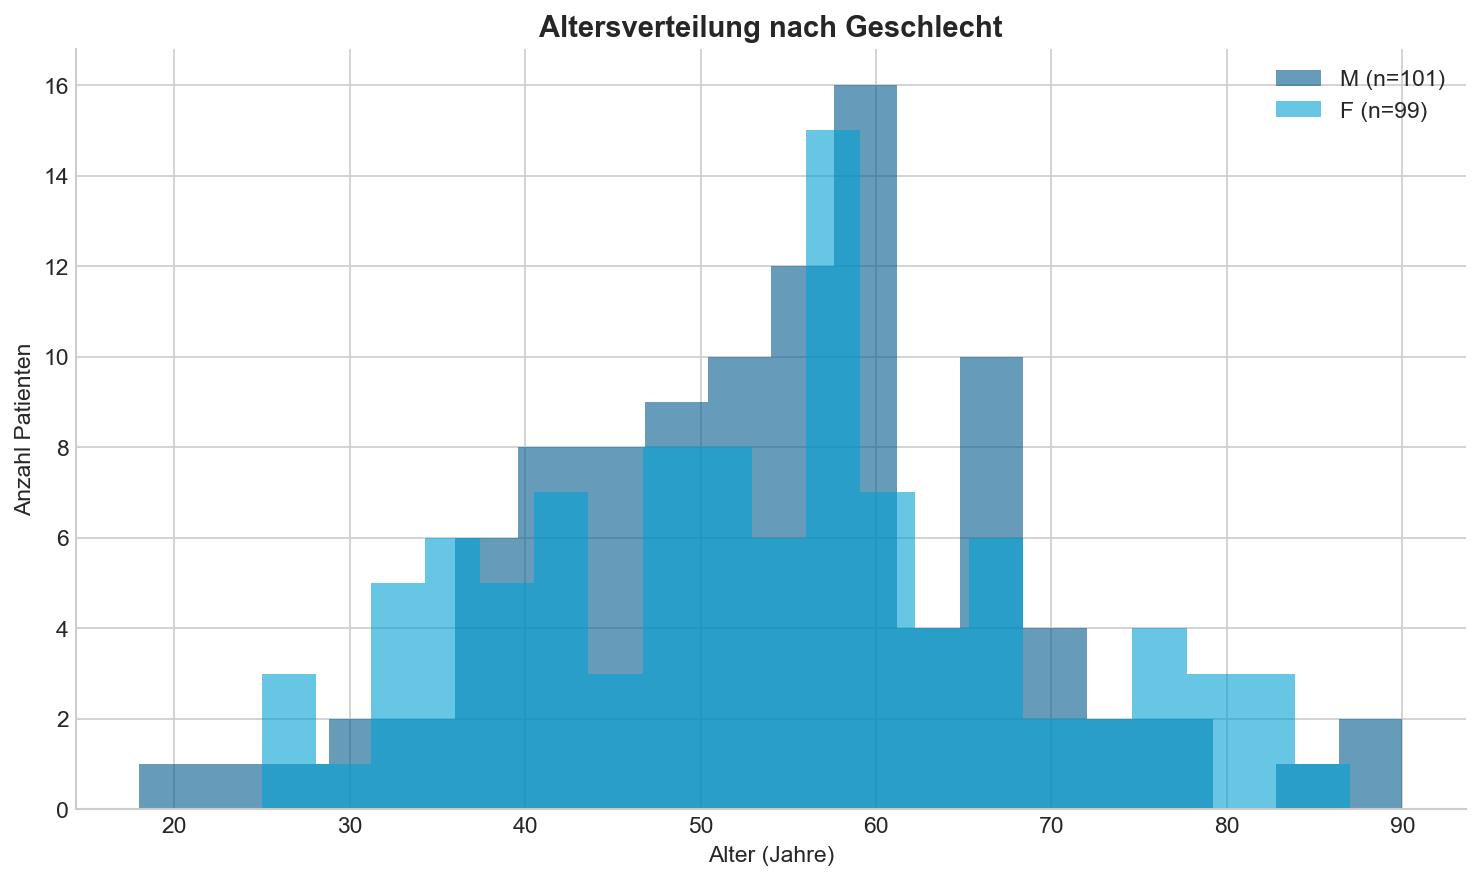

In [5]:
#| label: fig-age-distribution
#| fig-cap: "Altersverteilung nach Geschlecht"

fig, ax = plt.subplots(figsize=(10, 6))

for gender, color in [('M', PRECISION_COLORS['primary']), ('F', PRECISION_COLORS['accent'])]:
    subset = df[df['gender'] == gender]
    ax.hist(subset['age'], bins=20, alpha=0.6, label=f'{gender} (n={len(subset)})', color=color)

ax.set_xlabel('Alter (Jahre)')
ax.set_ylabel('Anzahl Patienten')
ax.set_title('Altersverteilung nach Geschlecht')
ax.legend()
plt.tight_layout()
plt.show()